In [1]:
using Plots
using Distributions
using Base.Threads
plot();

# Start

## funkcje

In [355]:
N(;μ=0, σ²=1,N::Int=1)=begin
    σ=√σ²
    n=round(Int,N/2)+1
    U₁=rand(n)
    U₂=rand(n)
    wyn=zeros(2*n)
    wyn[1:Int(end/2)]=sqrt.(-2*log.(U₁)).*sin.(2*π*U₂)
    wyn[Int(end/2)+1:end]=sqrt.(-2*log.(U₁)).*cos.(2*π*U₂)
    wyn[1:N]
end

N (generic function with 1 method)

In [105]:
Brown(;Δ=0.01,times=100,n=1000) = begin
    [cumsum(N(μ=0,σ²=1,N=n))*√Δ for i in 1:times]
end

Brown (generic function with 1 method)

In [14]:
Brown();

## czas wyjścia

In [132]:
Exit(;a=-2,b=2,x=0,Δ=0.01,Times=1e3)=begin
    y=x/√Δ
    time=0
    a′=a/√Δ
    b′=b/√Δ
    while a′<y<b′
        time+=1
        y+=ℕ()
    end
    return time*Δ, b′<=y
end

Exit (generic function with 1 method)

In [138]:
sum(Exit(a=1,b=5,x=4)[2] for i in 1:1e5)/1e5

0.7442

In [149]:
a=2.5;
b=3;
Up_to=1e5
sum(Exit(a=a,b=b,x=(b-a)*rand()+a)[2] for i in 1:Up_to)/Up_to

0.49965

In [152]:
Exit(;a=-2,b=2,x=0,Δ=0.01,Times=1e3)=begin
    y=x/√Δ
    time=0
    a′=a/√Δ
    b′=b/√Δ
    while a′<y<b′
        time+=1
        y+=rand(Normal())
    end
    return time*Δ, b′<=y
end

Exit (generic function with 1 method)

In [256]:
a=2.5;
b=3;
Up_to=1e5
k=rand()*10-5
a+=k
b+=k
mean(Exit(a=a,b=b,x=(b-a)*rand()+a)[1] for i in 1:Up_to)

0.07790320000005059

In [273]:
g(;Δ=1,M=1e4)=mean(Exit(a=0,b=Δ,x=Δ*rand())[1] for i in 1:M)

g (generic function with 1 method)

In [291]:
g(Δ=2)

0.7959400000000119

 78.902207 seconds (682.48 k allocations: 37.959 MiB, 0.36% compilation time)


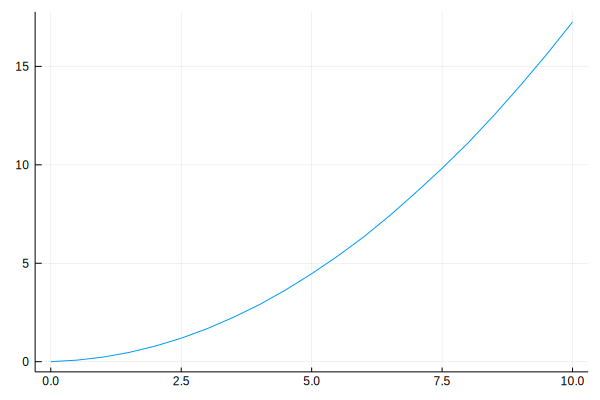

In [298]:
@time plot(0:0.5:10, Δ->g(Δ=Δ, M=1e6), leg=false)

In [331]:
plt=deepcopy(plt_save);

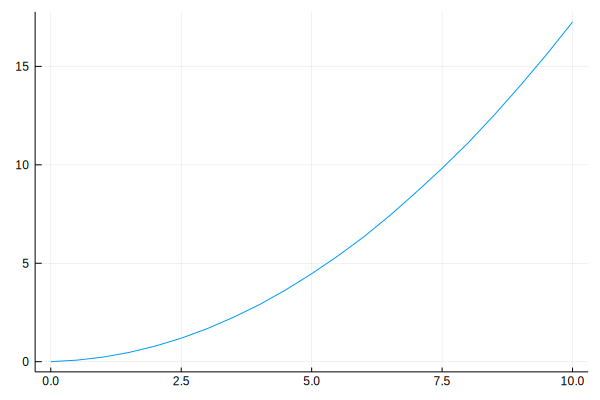

In [332]:
plot(plt)

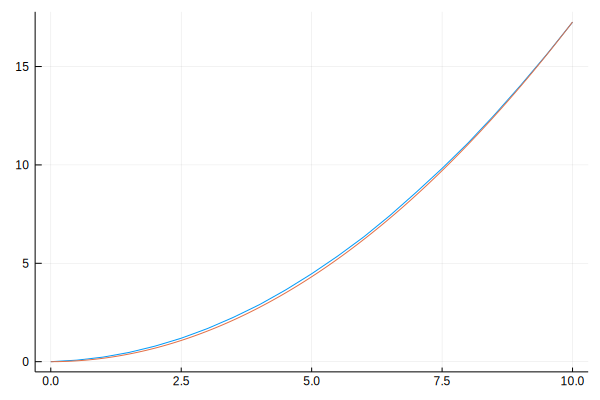

In [333]:
plot!(0:0.01:10, x->17.263*(x/10)^2)

In [329]:
g(Δ=10, M=1e6)

17.263147209996013

In [336]:
h(;x=1/2,Δ=1,M=1e4)=mean(Exit(a=0,b=Δ,x=x)[2] for i in 1:M)

h (generic function with 1 method)

In [337]:
h(x=1,Δ=10, M=1e6)

0.105036

192.923459 seconds (260.23 k allocations: 13.738 MiB, 0.11% compilation time)


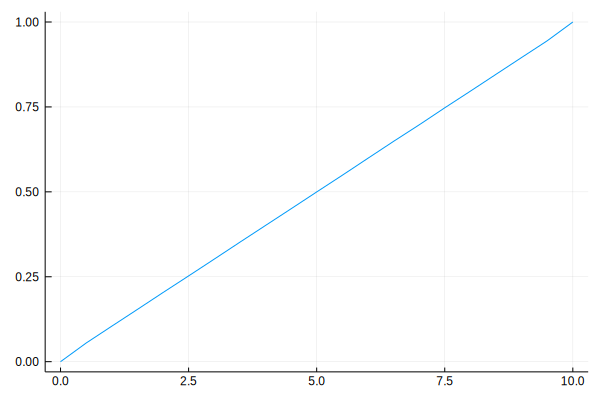

In [354]:
Δ=10
@time plot(0:0.5:Δ, x->h(x=x,Δ=Δ, M=1e6), leg=false)

In [350]:
h(x=1,Δ=2,M=1e3)

1.0

## czas wyjscia poprawny

In [3]:
Exit(;a=-2,b=2,x=0,Δ=0.01)=begin
    y=x/√Δ
    time=0
    a′=a/√Δ
    b′=b/√Δ
    while a′<y<b′
        time+=1
        y+=rand(Normal())
    end
    return time*Δ, b′<=y
end

Exit (generic function with 1 method)

In [86]:
test(x;a=0,b=2)=Exit(a=a,b=b,x=x)

test (generic function with 1 method)

In [85]:
Test(x;n=1e3,a=0,b=2)=mean(test(x,a=a,b=b)[1] for i in 1:n)

Test (generic function with 1 method)

In [63]:
Test(1,n=1e5)

1.1190114000000029

 96.681232 seconds (643.61 k allocations: 36.300 MiB, 0.02% gc time, 0.31% compilation time)


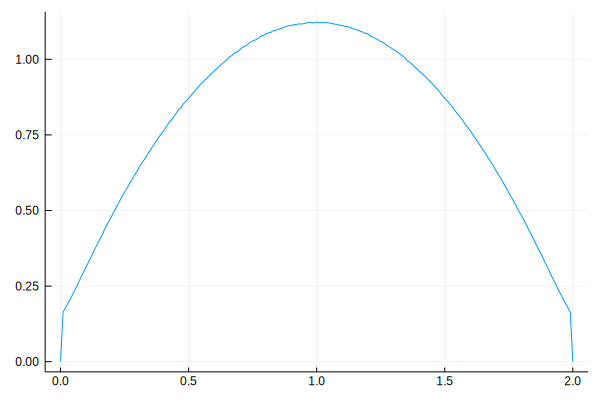

In [76]:
@time plot(0:0.01:2,x->Test(x,n=1e6),leg=false)

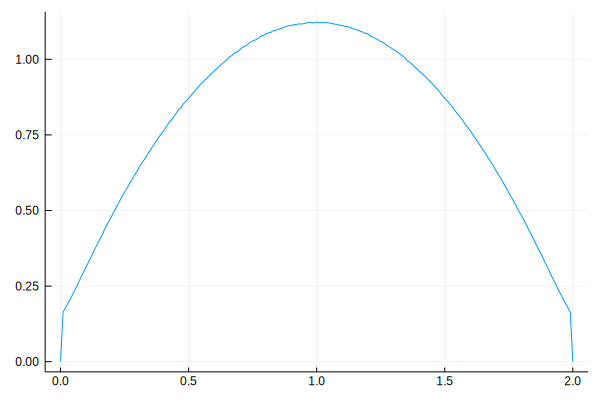

In [77]:
plt=plot!()

In [81]:
plt_copy=deepcopy(plt);
#plt_copy_save=deepcopy(plt);

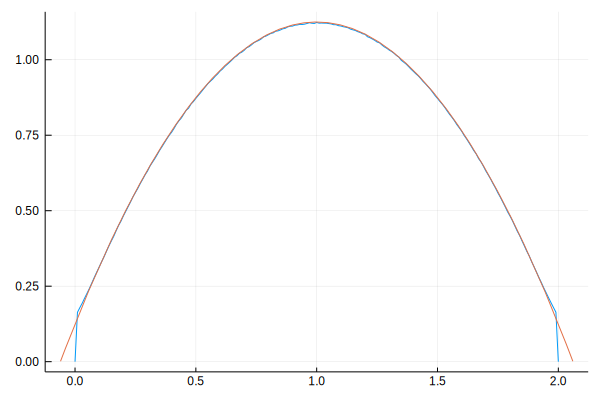

In [83]:
plot!(plt,x->-(x-1)^2+1.125)

 18.777197 seconds (670.84 k allocations: 37.887 MiB, 0.13% gc time, 1.66% compilation time)


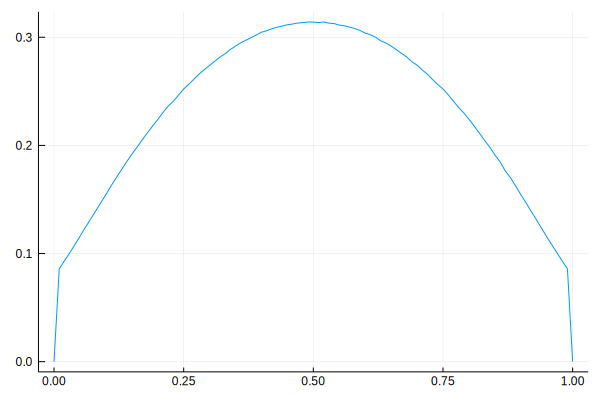

In [91]:
@time plot(0:0.01:1,x->Test(x,n=1e6,b=1),leg=false)

In [94]:
Test_len(b;n=1e3)=Test(b/2,b=b,n=n)

Test_len (generic function with 1 method)

In [120]:
Test_len(1,n=1e3)

0.3139000000000002

 17.097460 seconds (681.83 k allocations: 38.565 MiB, 0.12% gc time, 2.04% compilation time)


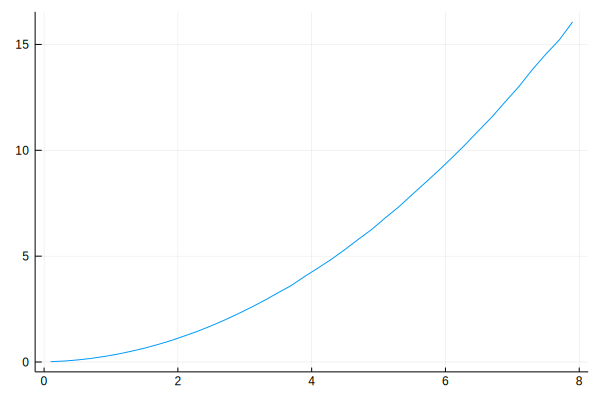

In [129]:
@time plot(0.1:0.2:8,x->Test_len(x,n=1e5),leg=false)

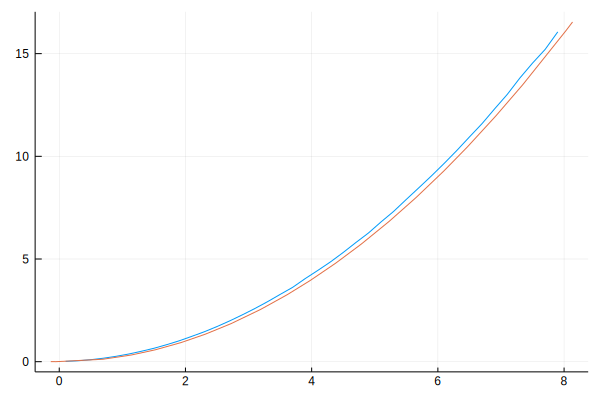

In [130]:
plot!(x->0.25*x^2)

# All in

In [2]:
N(;μ=0, σ²=1,N::Int=1)=begin
    σ=√σ²
    n=round(Int,N/2)+1
    U₁=rand(n)
    U₂=rand(n)
    wyn=zeros(2*n)
    wyn[1:Int(end/2)]=sqrt.(-2*log.(U₁)).*sin.(2*π*U₂)
    wyn[Int(end/2)+1:end]=sqrt.(-2*log.(U₁)).*cos.(2*π*U₂)
    wyn[1:N]
end

N (generic function with 1 method)

In [93]:
BrownExit(;Δ=0.01, lim=10, M=1e2, points_number=20) = begin
    results=[Matrix{Int}[] for _ in 1:Threads.nthreads()];
    n=round(Int,lim/Δ)+1 # zasada 3σ, dla 1 mamy 0.68 że się uda
    
    points=LinRange(0,lim,points_number)
    Threads.@threads for i in 1:M
        temp=cumsum(N(N=n))*√Δ
        while !any(temp.>lim) && !any(temp.<-lim)
            temp=cumsum(N(N=n))*√Δ
        end
        result_1=[argmax(abs.(temp).>points[i]) for i in 1:points_number]
        result_2=[temp[i]>0 for i in result_1]
        result=hcat(result_1,result_2)
        push!(results[Threads.threadid()],result)
    end
    reduce(vcat, results)
end

BrownExit (generic function with 1 method)

In [41]:
0.05

0.05

In [75]:
@time BrownExit(lim=14,M=12*8, points_number=100)

 11.845833 seconds (6.47 M allocations: 27.826 GiB, 41.94% gc time)


96-element Vector{Matrix{Int64}}:
 [1 0; 9 0; … ; 1324 0; 1333 0]
 [1 1; 4 1; … ; 798 1; 941 1]
 [1 1; 4 0; … ; 927 0; 1252 0]
 [1 0; 8 1; … ; 1335 1; 1366 1]
 [1 0; 3 0; … ; 1398 0; 1399 0]
 [1 0; 4 0; … ; 1391 0; 1395 0]
 [1 0; 1 0; … ; 1290 0; 1360 0]
 [1 0; 3 0; … ; 1166 0; 1335 0]
 [1 1; 9 1; … ; 1349 1; 1351 1]
 [1 1; 8 1; … ; 1070 1; 1081 1]
 [1 1; 14 0; … ; 1381 0; 1383 0]
 [1 0; 6 1; … ; 1342 1; 1343 1]
 [1 1; 3 1; … ; 1355 0; 1356 0]
 ⋮
 [1 1; 2 0; … ; 1115 0; 1218 0]
 [1 0; 4 1; … ; 1299 1; 1301 1]
 [1 0; 4 1; … ; 1147 0; 1165 0]
 [1 1; 4 1; … ; 988 1; 990 1]
 [1 1; 5 0; … ; 1292 1; 1292 1]
 [1 1; 7 0; … ; 1337 0; 1344 0]
 [1 0; 4 1; … ; 1327 0; 1368 0]
 [1 0; 4 0; … ; 1374 0; 1378 0]
 [1 0; 3 0; … ; 1276 1; 1292 1]
 [1 1; 5 1; … ; 1254 1; 1255 1]
 [1 1; 2 0; … ; 1344 0; 1346 0]
 [1 1; 2 1; … ; 1395 0; 1397 0]

In [76]:
A=ans

96-element Vector{Matrix{Int64}}:
 [1 0; 9 0; … ; 1324 0; 1333 0]
 [1 1; 4 1; … ; 798 1; 941 1]
 [1 1; 4 0; … ; 927 0; 1252 0]
 [1 0; 8 1; … ; 1335 1; 1366 1]
 [1 0; 3 0; … ; 1398 0; 1399 0]
 [1 0; 4 0; … ; 1391 0; 1395 0]
 [1 0; 1 0; … ; 1290 0; 1360 0]
 [1 0; 3 0; … ; 1166 0; 1335 0]
 [1 1; 9 1; … ; 1349 1; 1351 1]
 [1 1; 8 1; … ; 1070 1; 1081 1]
 [1 1; 14 0; … ; 1381 0; 1383 0]
 [1 0; 6 1; … ; 1342 1; 1343 1]
 [1 1; 3 1; … ; 1355 0; 1356 0]
 ⋮
 [1 1; 2 0; … ; 1115 0; 1218 0]
 [1 0; 4 1; … ; 1299 1; 1301 1]
 [1 0; 4 1; … ; 1147 0; 1165 0]
 [1 1; 4 1; … ; 988 1; 990 1]
 [1 1; 5 0; … ; 1292 1; 1292 1]
 [1 1; 7 0; … ; 1337 0; 1344 0]
 [1 0; 4 1; … ; 1327 0; 1368 0]
 [1 0; 4 0; … ; 1374 0; 1378 0]
 [1 0; 3 0; … ; 1276 1; 1292 1]
 [1 1; 5 1; … ; 1254 1; 1255 1]
 [1 1; 2 0; … ; 1344 0; 1346 0]
 [1 1; 2 1; … ; 1395 0; 1397 0]

In [80]:
A=BrownExit(lim=100,M=10000, points_number=100);

In [90]:
B=BrownExit(lim=100,M=10, points_number=10);

In [84]:
size(B), size(B[1])

((10,), (10, 2))

In [102]:
B[6]

10×2 Matrix{Int64}:
    1  1
 2505  0
 4647  0
    1  1
    1  1
    1  1
    1  1
    1  1
    1  1
    1  1

# analiza

In [99]:
lim=14
M=12*8
points_number=100
Δ=0.01
exit_interval=LinRange(0,lim,points_number)

100-element LinRange{Float64, Int64}:
 0.0,0.141414,0.282828,0.424242,…,13.4343,13.5758,13.7172,13.8586,14.0

In [77]:
A

96-element Vector{Matrix{Int64}}:
 [1 0; 9 0; … ; 1324 0; 1333 0]
 [1 1; 4 1; … ; 798 1; 941 1]
 [1 1; 4 0; … ; 927 0; 1252 0]
 [1 0; 8 1; … ; 1335 1; 1366 1]
 [1 0; 3 0; … ; 1398 0; 1399 0]
 [1 0; 4 0; … ; 1391 0; 1395 0]
 [1 0; 1 0; … ; 1290 0; 1360 0]
 [1 0; 3 0; … ; 1166 0; 1335 0]
 [1 1; 9 1; … ; 1349 1; 1351 1]
 [1 1; 8 1; … ; 1070 1; 1081 1]
 [1 1; 14 0; … ; 1381 0; 1383 0]
 [1 0; 6 1; … ; 1342 1; 1343 1]
 [1 1; 3 1; … ; 1355 0; 1356 0]
 ⋮
 [1 1; 2 0; … ; 1115 0; 1218 0]
 [1 0; 4 1; … ; 1299 1; 1301 1]
 [1 0; 4 1; … ; 1147 0; 1165 0]
 [1 1; 4 1; … ; 988 1; 990 1]
 [1 1; 5 0; … ; 1292 1; 1292 1]
 [1 1; 7 0; … ; 1337 0; 1344 0]
 [1 0; 4 1; … ; 1327 0; 1368 0]
 [1 0; 4 0; … ; 1374 0; 1378 0]
 [1 0; 3 0; … ; 1276 1; 1292 1]
 [1 1; 5 1; … ; 1254 1; 1255 1]
 [1 1; 2 0; … ; 1344 0; 1346 0]
 [1 1; 2 1; … ; 1395 0; 1397 0]

In [86]:
n1=size(A)[1]
n2,n3=size(A[1])

(100, 2)

In [95]:
maximum(A[i][end,1] for i in 1:n1)*Δ

14.01

In [103]:
a,b=3,60

(3, 60)

In [107]:
A[1][3,:]

2-element Vector{Int64}:
 12
  0

In [ ]:
A[1][3,:]

# Test

In [110]:
A=Brown()[1];

In [116]:
argmax(abs.(A).>2)

385

In [114]:
maximum(A)

2.1415736466007926

In [119]:
(abs.(A).>2)[380:400]

21-element BitVector:
 0
 0
 0
 0
 0
 1
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [58]:
temp_1=[i for i in 1:20]
temp_2=[(i-4)^2 for i in temp_1];

In [62]:
hcat(temp_1,temp_2)

20×2 Matrix{Int64}:
  1    9
  2    4
  3    1
  4    0
  5    1
  6    4
  7    9
  8   16
  9   25
 10   36
 11   49
 12   64
 13   81
 14  100
 15  121
 16  144
 17  169
 18  196
 19  225
 20  256

In [8]:
g(T;L,Times)=begin
    
    Threads.@threads for a in 1:Threads.nthreads()
        result = f(L=L, Times=Times,T=T)
        push!(results[Threads.threadid()], result)
    end
    return results
end

g (generic function with 1 method)

In [51]:
?argmax

search: argmax



```
argmax(r::AbstractRange)
```

Ranges can have multiple maximal elements. In that case `argmax` will return a maximal index, but not necessarily the first one.

---

```
argmax(f, domain)
```

Return a value `x` in the domain of `f` for which `f(x)` is maximised. If there are multiple maximal values for `f(x)` then the first one will be found.

`domain` must be a non-empty iterable.

Values are compared with `isless`.

!!! compat "Julia 1.7"
    This method requires Julia 1.7 or later.


# Examples

```jldoctest
julia> argmax(abs, -10:5)
-10

julia> argmax(cos, 0:π/2:2π)
0.0
```

---

```
argmax(itr)
```

Return the index or key of the maximal element in a collection. If there are multiple maximal elements, then the first one will be returned.

The collection must not be empty.

Values are compared with `isless`.

See also: [`argmin`](@ref), [`findmax`](@ref).

# Examples

```jldoctest
julia> argmax([8, 0.1, -9, pi])
1

julia> argmax([1, 7, 7, 6])
2

julia> argmax([1, 7, 7, NaN])
4
```

---

```
argmax(A; dims) -> indices
```

For an array input, return the indices of the maximum elements over the given dimensions. `NaN` is treated as greater than all other values except `missing`.

# Examples

```jldoctest
julia> A = [1.0 2; 3 4]
2×2 Matrix{Float64}:
 1.0  2.0
 3.0  4.0

julia> argmax(A, dims=1)
1×2 Matrix{CartesianIndex{2}}:
 CartesianIndex(2, 1)  CartesianIndex(2, 2)

julia> argmax(A, dims=2)
2×1 Matrix{CartesianIndex{2}}:
 CartesianIndex(1, 2)
 CartesianIndex(2, 2)
```


# Śmieci - test

In [11]:
cdf(Normal(0,2),1)+cdf(Normal(0,1),-2)

0.7142125932221923

In [36]:
temp_test(w)=begin
    σ=1
    while 1-cdf(Normal(0,σ),w)+cdf(Normal(0,σ),-w)<1/2
        σ+=1
    end
    σ
end

temp_test (generic function with 1 method)

In [18]:
test(w,t)=1-cdf(Normal(0,t),w)+cdf(Normal(0,t),-w)

test (generic function with 1 method)

In [28]:
test(1,10)

0.920344325445942

In [44]:
temp_test(1000)

1483

In [45]:
temp2(w)=cdf(Normal(0,1.5*w),-w)+1-cdf(Normal(0,1.5*w),w)

temp2 (generic function with 1 method)

In [48]:
temp2(10)

0.5049850750938458